# ЛР №1

## 1) Текстовое описание набора данных
В качестве набора данных использхуется набор данных со статистикой уровня Мировой прогресс в вакцинации против COVID-19.
Содержание

Эти данные содержат следующую информацию:

-Страна - это страна, для которой предоставляется информация о вакцинации;
-Country ISO Code - код ISO для страны;
Дата - дата ввода данных; для некоторых дат у нас есть только ежедневные прививки, для других - только (кумулятивная) общая сумма;
Общее количество прививок - это абсолютное количество общих прививок в стране;
Общее количество вакцинированных - человек, в зависимости от схемы иммунизации, получит одну или несколько (обычно 2) вакцин; в определенный момент количество вакцинированных может быть больше, чем количество людей;
Общее число полностью вакцинированных людей - это число людей, получивших весь набор иммунизации по схеме иммунизации (обычно 2); в определенный момент времени может быть определенное число людей, получивших одну вакцину, и другое число (меньшее) людей, получивших все вакцины по схеме иммунизации.;
Ежедневные прививки (raw) - для определенного ввода данных количество прививок на эту дату/страну;
Ежедневные прививки - для определенного ввода данных, количество прививок на эту дату/страну;
Общее количество прививок на сотню - соотношение (в процентах) между количеством прививок и общей численностью населения на сегодняшний день в стране;
Общее количество вакцинированных на сто человек - соотношение (в процентах) между привитым населением и общей численностью населения на сегодняшний день в стране;
Общее количество полностью вакцинированных людей на сотню - соотношение (в процентах) между полностью иммунизированным населением и общей численностью населения на сегодняшний день в стране;
Количество прививок в день - количество ежедневных прививок за этот день и страну;
Ежедневные прививки на миллион - соотношение (в промилле) между количеством прививок и общей численностью населения на текущую дату в стране;
Вакцины, используемые в стране - общее количество вакцин, используемых в стране (на сегодняшний день);
Название источника - источник информации (национальный орган, международная организация, местная организация и т. д.);
Source website - сайт источника информации;

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline

### Загрузка данных

In [2]:
happy_data = pd.read_csv('country_vaccinations.csv', sep = ',' )

## 2)Основные характеристики датасета

In [3]:
# Первые пять строк датасета
happy_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [4]:
# Размер датасета
happy_data.shape

(3555, 15)

In [5]:
# Количество нулевых элементов
happy_data.isnull().sum()

country                                   0
iso_code                                272
date                                      0
total_vaccinations                     1214
people_vaccinated                      1615
people_fully_vaccinated                2277
daily_vaccinations_raw                 1583
daily_vaccinations                      135
total_vaccinations_per_hundred         1214
people_vaccinated_per_hundred          1615
people_fully_vaccinated_per_hundred    2277
daily_vaccinations_per_million          135
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [6]:
 # Колонки и их типы данных
happy_data.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [7]:
# Описание датасета
happy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3555 entries, 0 to 3554
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              3555 non-null   object 
 1   iso_code                             3283 non-null   object 
 2   date                                 3555 non-null   object 
 3   total_vaccinations                   2341 non-null   float64
 4   people_vaccinated                    1940 non-null   float64
 5   people_fully_vaccinated              1278 non-null   float64
 6   daily_vaccinations_raw               1972 non-null   float64
 7   daily_vaccinations                   3420 non-null   float64
 8   total_vaccinations_per_hundred       2341 non-null   float64
 9   people_vaccinated_per_hundred        1940 non-null   float64
 10  people_fully_vaccinated_per_hundred  1278 non-null   float64
 11  daily_vaccinations_per_million

In [8]:
# Статистические данные
happy_data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.341000e+03,1.940000e+03,1.278000e+03,1.972000e+03,3.420000e+03,2341.000000,1940.000000,1278.000000,3420.000000
mean,1.486319e+06,1.238670e+06,3.796973e+05,7.404549e+04,5.718444e+04,6.074088,5.177969,1.791369,2284.028070
std,4.911831e+06,4.052163e+06,1.418143e+06,2.052344e+05,1.778443e+05,11.429798,8.545284,4.569888,3829.687329
min,0.000000e+00,0.000000e+00,1.000000e+00,-5.001200e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.918300e+04,2.636475e+04,8.366000e+03,1.970750e+03,1.178750e+03,0.580000,0.590000,0.130000,346.750000
50%,1.895250e+05,1.661540e+05,3.328900e+04,1.142100e+04,6.034500e+03,2.370000,2.330000,0.710000,1024.000000
75%,7.496820e+05,6.296642e+05,1.914042e+05,5.655075e+04,2.897950e+04,5.410000,4.320000,1.460000,1942.000000
max,5.958504e+07,4.197740e+07,1.703912e+07,2.242472e+06,1.916190e+06,85.420000,49.640000,35.780000,30869.000000


In [9]:
# Удаляем столбец iso_code
happy_data = happy_data.drop('iso_code', axis = 1)

In [10]:
# Первые пять строк датасета
happy_data.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [11]:
# Определим уникальные значения для целевого признака
happy_data['total_vaccinations_per_hundred'].unique()

array([0.000e+00,       nan, 1.000e-02, 2.000e-02, 4.000e-02, 6.000e-02,
       1.100e-01, 1.700e-01, 7.500e-01, 1.340e+00, 1.670e+00, 2.100e+00,
       8.940e+00, 7.000e-02, 9.000e-02, 2.400e-01, 3.700e-01, 4.400e-01,
       5.500e-01, 5.900e-01, 6.200e-01, 6.400e-01, 6.500e-01, 6.800e-01,
       7.000e-01, 7.300e-01, 7.600e-01, 8.100e-01, 8.300e-01, 8.800e-01,
       9.800e-01, 1.040e+00, 1.110e+00, 1.130e+00, 1.140e+00, 1.180e+00,
       1.270e+00, 1.310e+00, 1.350e+00, 1.410e+00, 1.480e+00, 5.200e-01,
       8.400e-01, 9.100e-01, 9.900e-01, 1.080e+00, 1.700e+00, 1.820e+00,
       1.870e+00, 1.900e+00, 1.970e+00, 2.080e+00, 2.130e+00, 2.200e+00,
       2.320e+00, 2.450e+00, 2.500e+00, 2.530e+00, 2.680e+00, 2.810e+00,
       2.910e+00, 3.080e+00, 3.160e+00, 3.220e+00, 3.310e+00, 3.460e+00,
       3.660e+00, 3.810e+00, 4.060e+00, 4.090e+00, 4.150e+00, 4.470e+00,
       4.640e+00, 4.940e+00, 5.170e+00, 2.290e+00, 2.940e+00, 2.970e+00,
       3.030e+00, 3.150e+00, 3.230e+00, 3.290e+00, 

## 3) Визуальное исследование датасета

array([[<AxesSubplot:title={'center':'total_vaccinations'}>,
        <AxesSubplot:title={'center':'people_vaccinated'}>,
        <AxesSubplot:title={'center':'people_fully_vaccinated'}>],
       [<AxesSubplot:title={'center':'daily_vaccinations_raw'}>,
        <AxesSubplot:title={'center':'daily_vaccinations'}>,
        <AxesSubplot:title={'center':'total_vaccinations_per_hundred'}>],
       [<AxesSubplot:title={'center':'people_vaccinated_per_hundred'}>,
        <AxesSubplot:title={'center':'people_fully_vaccinated_per_hundred'}>,
        <AxesSubplot:title={'center':'daily_vaccinations_per_million'}>]],
      dtype=object)

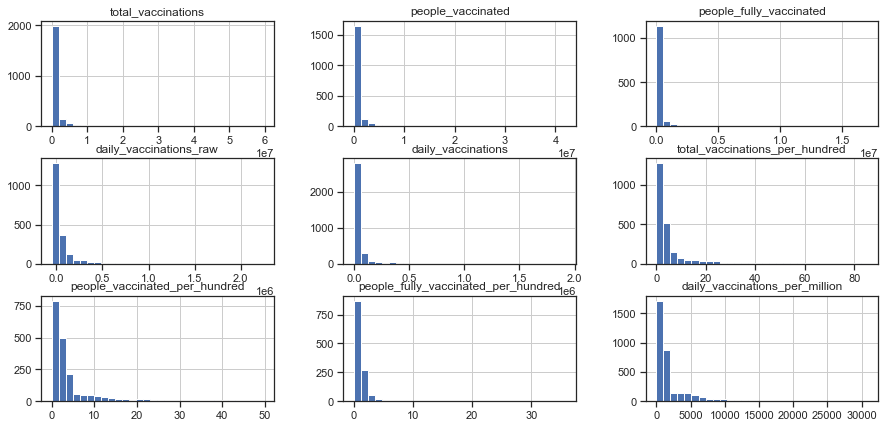

In [12]:
# Гистограммы для всех признаков
happy_data.hist(bins=30, figsize = (15,7))

<Figure size 864x432 with 0 Axes>

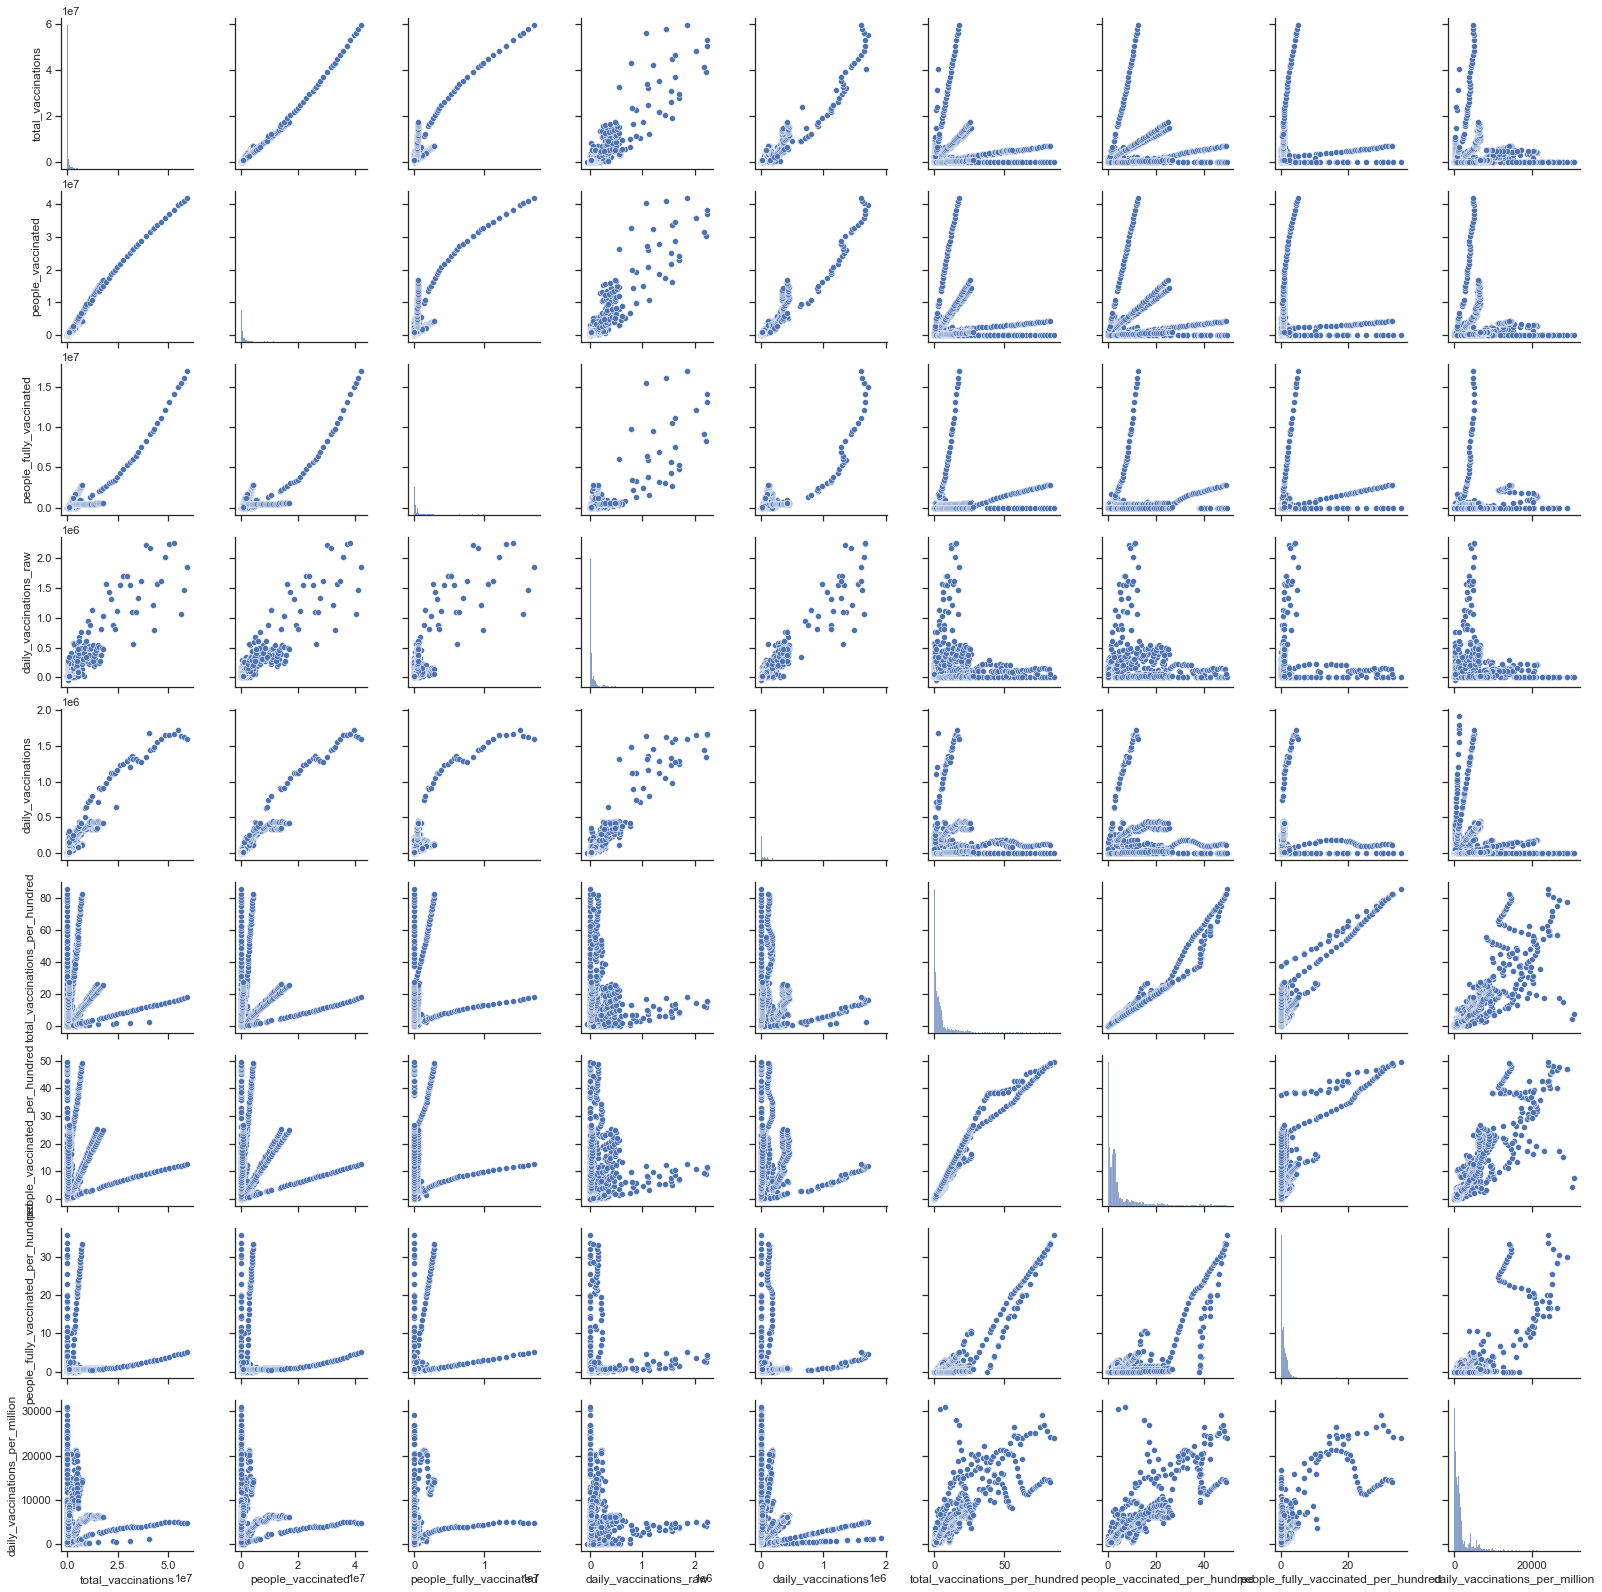

In [13]:
# Диаграммы рассеяние для всех признаков
plt.figure(figsize=(12,6))
sns.pairplot(happy_data)

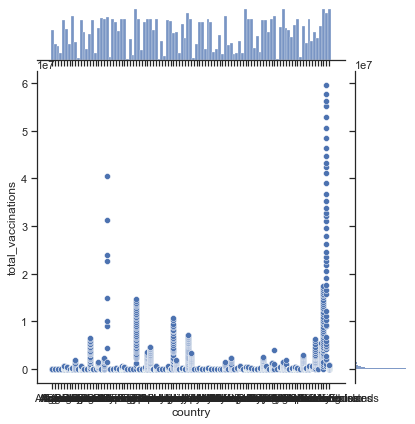

In [14]:
# Увеличенные диаграммы рассеяния для признаков, которые имеют зависимость с уровнем счастья
sns.jointplot(x = "country", y = "total_vaccinations", kind="scatter", data = happy_data)

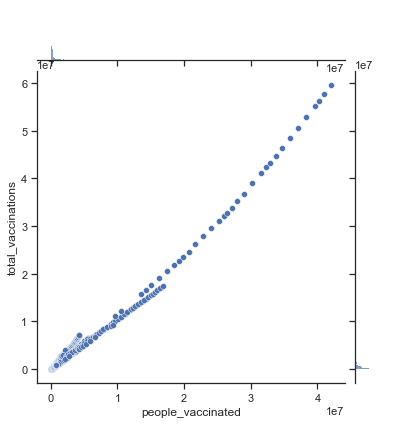

In [15]:
sns.jointplot(x = "people_vaccinated", y = "total_vaccinations", kind="scatter", data = happy_data)

<AxesSubplot:xlabel='daily_vaccinations_per_million'>

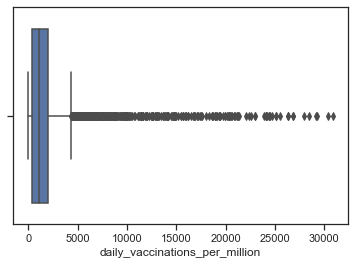

In [16]:
# Одномерное распределение вероятности
sns.boxplot(x=happy_data['daily_vaccinations_per_million'])

<AxesSubplot:xlabel='daily_vaccinations_per_million'>

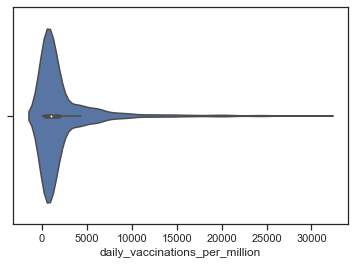

In [17]:
sns.violinplot(x=happy_data['daily_vaccinations_per_million'])

## 4) Корреляции признаков

In [18]:
corr_matrix = happy_data.corr()

In [19]:
corr_matrix['total_vaccinations']

total_vaccinations                     1.000000
people_vaccinated                      0.993481
people_fully_vaccinated                0.925160
daily_vaccinations_raw                 0.903775
daily_vaccinations                     0.962647
total_vaccinations_per_hundred         0.194192
people_vaccinated_per_hundred          0.203267
people_fully_vaccinated_per_hundred    0.095012
daily_vaccinations_per_million         0.129083
Name: total_vaccinations, dtype: float64

<AxesSubplot:>

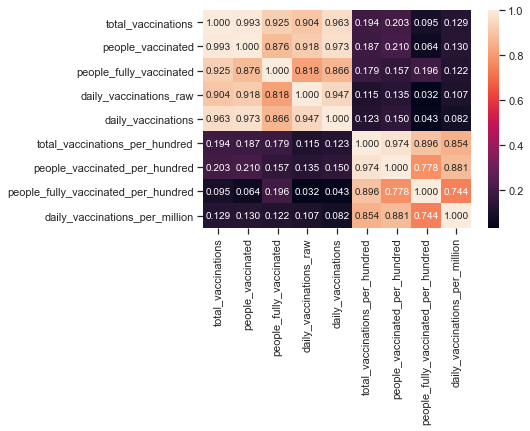

In [20]:
sns.heatmap(happy_data.corr(), annot=True, fmt='.3f')